In [ ]:
# !pip install dtaidistance
# src: https://github.com/wannesm/dtaidistance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from dtaidistance import dtw

In [2]:
def preprocess(plot=False):
    rpath = 'emoji/original/'
    wpath = 'emoji/template/'

    for f in os.listdir(rpath):
        file = rpath + f
        img = cv2.imread(file, -1)
        mask = img[:,:,3]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        y = 191    
        temp = np.ones(img.shape) * 255
        temp[(img != y) & (mask > 0)] = 0
        cv2.imwrite(wpath + f, temp)
        
        if plot:
            plt.imshow(temp)
            plt.show()

In [3]:
def plotemoji(file, plot=True):
    img = cv2.imread(file, 0)
    img = cv2.resize(img, (512,512))

    n = []
    e = []
    s = []
    w = []

    b = img.min()

    for i in range(img.shape[0]):
        ind = np.where(img[i,:] == b)[0]
        if len(ind) == 0:
            n.append(img.shape[1])
            s.append(img.shape[1])
        else:
            n.append(ind[0])
            s.append(img.shape[0]-ind[-1])

    for i in range(img.shape[1]):
        ind = np.where(img[:,i] == b)[0]
        if len(ind) == 0:
            w.append(img.shape[0])
            e.append(img.shape[0])
        else:
            w.append(ind[0])
            e.append(img.shape[1]-ind[-1])
            
    ts = n + e + s + w
    
    if plot:
        print(file)
        plt.plot(ts)
        plt.show()
    
    return np.array(ts, dtype=np.float)

In [4]:
def loademojits(plot=False):
    rpath = 'emoji/template/'
    emots = []

    for f in os.listdir(rpath):
        file = rpath + f
        ts = plotemoji(file, plot=plot)
        emots.append((ts,f))
        
    return emots

In [5]:
emojipath = 'emoji/original/'

def matchemoji(file, plot=True):
    test = plotemoji(file, plot=False)
    dmin = 100000
    for (e,f) in emots:
        d = dtw.distance_fast(e, test)
        if d < dmin:
            dmin = d
            ans = f
            temp = e
    
    if plot:
        print(file, ' --> ', ans)
        
        timg = cv2.imread(file, 0)
        eimg = cv2.imread(emojipath + ans)
        
        f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw = {'width_ratios':[1, 1, 3]}, figsize=(15,3))
        a0.imshow(timg, cmap='gray')
        a0.axis('off')
        a1.imshow(cv2.cvtColor(eimg, cv2.COLOR_BGR2RGB))
        a1.axis('off')
        a2.plot(test)
        a2.plot(temp)
        plt.show()
        
    return (ans[:-4] in file)

In [6]:
def computeacc():
    rpath = 'emoji/test/'
    acc = 0
    n = len(os.listdir(rpath))

    for f in os.listdir(rpath):
        file = rpath + f
        acc += matchemoji(file, plot=False)

    print('Model Accuracy:', format(acc/n, '.2f'), '( False:', n-acc , '/', n ,')')
    
    return acc/n

In [7]:
preprocess()

In [8]:
emots = loademojits()

In [9]:
acc = computeacc()

Model Accuracy: 0.84 ( False: 7 / 45 )


emoji/test/angry-d.png  -->  angry.png


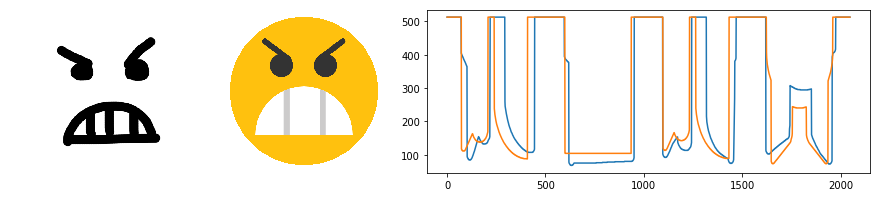

True

In [10]:
file = 'emoji/test/angry-d.png'
matchemoji(file)

emoji/test/angry-d.png


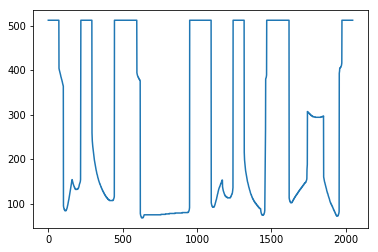

array([ 512.,  512.,  512., ...,  512.,  512.,  512.])

In [11]:
plotemoji(file)

emoji/template/angry.png


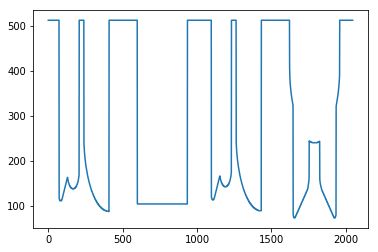

array([ 512.,  512.,  512., ...,  512.,  512.,  512.])

In [12]:
plotemoji('emoji/template/angry.png')